In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import time
import matplotlib.pyplot as plt
from pydae.svg_tools import svg,grid2svg
from IPython.core.display import HTML,SVG
import pydae.grid_tools as gt
import pydae.plot_tools as pplt

import scipy.optimize as sopt
import pandas as pd
from scipy.optimize import NonlinearConstraint

colors = pplt.set_style(plt)

ImportError: cannot import name 'grid2svg' from 'pydae.svg_tools' (c:\Users\jmmau\anaconda3\Lib\site-packages\pydae\svg_tools\__init__.py)

In [2]:
import cigre_eu_lv_acdc
import cigre_eu_lv_acdc_tools as tools

ModuleNotFoundError: No module named 'cigre_eu_lv_acdc_cffi'

In [1]:
params = {}
excel_file = '../cigre_lv.xlsx'

cases = []

for case_name in ['Case 0','Case 1','Case 2','Case 3']:
    case = tools.loads()
    case.params = {}
    case.case = case_name
    case.read(excel_file)
    times = np.arange(0,25*3600,1*3600)
    case.report_profiles(times)

    for area in ['res','ind','com']:
        case.profiles[area]['s_load_ac'] =  case.profiles[area]['p_load_ac'] + 1j*case.profiles[area]['q_load_ac']
        case.profiles[area]['s_chargers_ac'] =  case.profiles[area]['p_charger_ac'] + 1j*case.profiles[area]['q_charger_ac']
        case.profiles[area]['s_total_ac'] =  case.profiles[area]['s_load_ac'] + case.profiles[area]['s_chargers_ac']
        case.profiles[area]['s_load_dc'] =  case.profiles[area]['p_load_dc']  
        case.profiles[area]['s_chargers_dc'] =  case.profiles[area]['p_charger_dc']  
        case.profiles[area]['s_total_dc'] =  case.profiles[area]['s_load_dc'] + case.profiles[area]['s_chargers_dc']

    cases += [case]

NameError: name 'tools' is not defined

In [2]:


fig, axes = plt.subplots(nrows=4,ncols=4, figsize=(3.3*3, 8.0), gridspec_kw={'height_ratios': [3, 1.5, 2, 1.5]},dpi=100)



for ic,case_name in enumerate(['Case 0','Case 1','Case 2','Case 3']) :
    axes[0,ic].plot([0,25], [500]*2,':',color=colors[0],alpha=0.3)
    axes[0,ic].plot([0,25], [150]*2,':',color=colors[1],alpha=0.3)
    axes[0,ic].plot([0,25], [300]*2,':',color=colors[2],alpha=0.3)
    
    for il, area in enumerate(['res','ind','com']):
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_total_ac'])/1e3,color=colors[il], label=area.upper())
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_load_ac'])/1e3,color=colors[il], alpha=0.3)
        axes[1,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_ac'].real/1e3,color=colors[il], label=area.upper())
        axes[2,ic].plot(times/3600, cases[ic].profiles[area]['s_total_dc'].real/1e3,color=colors[il], label=area.upper())
        axes[3,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_dc'].real/1e3,color=colors[il], label=area.upper())

    if ic == 0:
        axes[0,ic].set_ylabel('Apparent powers (kVA)')
        axes[1,ic].set_ylabel('AC Chargers powers (kW)')
        axes[2,ic].set_ylabel('DC load powers (kW)')
        axes[3,ic].set_ylabel('DC Chargers powers (kW)')

    axes[3,ic].set_xlabel('Time (h)')
    
    axes[0,ic].set_ylim([0,700])
    axes[1,ic].set_ylim([0,200])  
    axes[2,ic].set_ylim([0,400])    
    axes[3,ic].set_ylim([0,60])    

    axes[0,ic].legend(loc='upper left')
    axes[0,ic].set_xticks([0,4,8,12,16,20,24])
    axes[1,ic].set_xticks([0,4,8,12,16,20,24])
    axes[2,ic].set_xticks([0,4,8,12,16,20,24])
    axes[3,ic].set_xticks([0,4,8,12,16,20,24])
    
    for ax in axes[:,ic]:
        ax.grid()
        ax.set_xlim([0,24])
        
axes[0,0].set_title('Case 0')
axes[0,1].set_title('Case 1')
axes[0,2].set_title('Case 2')
axes[0,3].set_title('Case 3')

fig.tight_layout()
fig.savefig('loads_powers.pdf')
fig.savefig('loads_powers.png', dpi=300)

NameError: name 'plt' is not defined

In [5]:

import json

data_input = open('cigre_eu_lv_acdc.json').read().replace("'",'"')
data = json.loads(data_input)
svg_string = open('./figs/cigre_eu_lv_acdc_v2.svg').read()

for line in data['lines']:
    if "bus_j_nodes" in line:
        for ph1,ph2 in zip(['a','n'],['0','1']):
            line_old = f"l_{line['bus_j']}_{line['bus_k']}_{ph1}"
            if line_old in svg_string:
                line_new = f"l_{line['bus_j']}_{ph2}_{line['bus_k']}_{ph2}"
                svg_string = svg_string.replace(line_old,line_new)

    else:
        for ph1,ph2 in zip(['a','b','c','n'],['0','1','2','3']):
            line_old = f"l_{line['bus_j']}_{line['bus_k']}_{ph1}"
            if line_old in svg_string:
                line_new = f"l_{line['bus_j']}_{ph2}_{line['bus_k']}_{ph2}"
                svg_string = svg_string.replace(line_old,line_new)

with open('./figs/cigre_eu_lv_acdc_v3.svg','w') as fobj:
    fobj.write(svg_string)


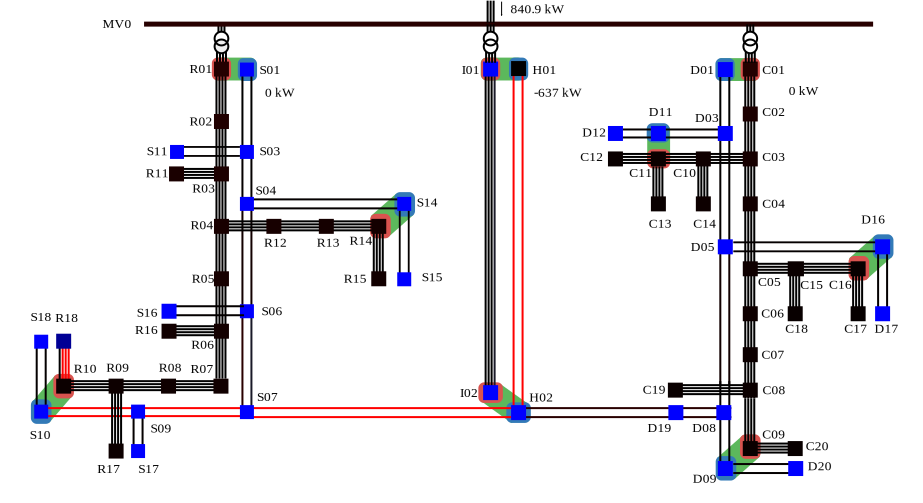

In [6]:
params = {"K_xif":0.01,
'e_ao_m_MV0':1.02*11547.00,
'e_bo_m_MV0':1.02*11547.00,
'e_co_m_MV0':1.02*11547.00,
'p_load_R18_a':100e3,
'p_load_R18_b':100e3,
'p_load_R18_c':100e3,
'p_vsc_a_R10':100e3,
'p_vsc_b_R10':100e3,
'p_vsc_c_R10':100e3,}

model = cigre_eu_lv_acdc.model()
model.ini(params,'xy_0.json')
#model.report_y()

s = svg('./figs/cigre_eu_lv_acdc_v3.svg')
s.set_grid(model,'cigre_eu_lv_acdc.json')
s.set_text('VSC_R01_S01_P',f"{model.get_value('p_vsc_S01')/1000:2.0f} kW")
s.set_text('VSC_I01_H01_P',f"{model.get_value('p_vsc_H01')/1000:2.0f} kW")
s.set_text('VSC_C01_D01_P',f"{model.get_value('p_vsc_D01')/1000:2.0f} kW")
# S_grid = tools.get_head_power(grid)

s.set_text('MV0_P',f"{model.get_value('p_MV0')/1000:5.1f} kW")
s.set_tooltips('case_new_opt.svg')    
SVG('case_new_opt.svg')

In [10]:
model.report_z()

i_l_R01_0_R02_0_r = 33.27
i_l_R01_0_R02_0_i = -22.56
i_l_R01_1_R02_1_r = -35.29
i_l_R01_1_R02_1_i = -16.17
i_l_R01_2_R02_2_r =  2.77
i_l_R01_2_R02_2_i = 37.29
i_l_R01_3_R02_3_r = -0.73
i_l_R01_3_R02_3_i =  1.41
i_l_R02_0_R03_0_r = 33.27
i_l_R02_0_R03_0_i = -22.56
i_l_R02_1_R03_1_r = -35.29
i_l_R02_1_R03_1_i = -16.17
i_l_R02_2_R03_2_r =  2.77
i_l_R02_2_R03_2_i = 37.29
i_l_R02_3_R03_3_r = -0.73
i_l_R02_3_R03_3_i =  1.41
i_l_R03_0_R04_0_r = 29.61
i_l_R03_0_R04_0_i = -20.34
i_l_R03_1_R04_1_r = -31.54
i_l_R03_1_R04_1_i = -14.11
i_l_R03_2_R04_2_r =  2.69
i_l_R03_2_R04_2_i = 33.01
i_l_R03_3_R04_3_r = -0.73
i_l_R03_3_R04_3_i =  1.41
i_l_R04_0_R05_0_r = 25.94
i_l_R04_0_R05_0_i = -18.12
i_l_R04_1_R05_1_r = -27.78
i_l_R04_1_R05_1_i = -12.04
i_l_R04_2_R05_2_r =  2.60
i_l_R04_2_R05_2_i = 28.73
i_l_R04_3_R05_3_r = -0.73
i_l_R04_3_R05_3_i =  1.40
i_l_R05_0_R06_0_r = 25.94
i_l_R05_0_R06_0_i = -18.12
i_l_R05_1_R06_1_r = -27.78
i_l_R05_1_R06_1_i = -12.04
i_l_R05_2_R06_2_r =  2.60
i_l_R05_2_R06_2_i = 28.

Input or parameter v_MV0_a_r not found.
Input or parameter v_MV0_a_i not found.
Input or parameter v_MV0_b_r not found.
Input or parameter v_MV0_b_i not found.
Input or parameter v_MV0_c_r not found.
Input or parameter v_MV0_c_i not found.
Input or parameter p_load_S11_a not found.
Input or parameter q_load_S11_a not found.
Input or parameter p_load_S15_a not found.
Input or parameter q_load_S15_a not found.
Input or parameter p_load_S16_a not found.
Input or parameter q_load_S16_a not found.
Input or parameter p_load_S17_a not found.
Input or parameter q_load_S17_a not found.
Input or parameter p_load_S18_a not found.
Input or parameter q_load_S18_a not found.
Input or parameter p_load_H02_a not found.
Input or parameter q_load_H02_a not found.
Input or parameter p_load_D12_a not found.
Input or parameter q_load_D12_a not found.
Input or parameter p_load_D17_a not found.
Input or parameter q_load_D17_a not found.
Input or parameter p_load_D19_a not found.
Input or parameter q_load_D19

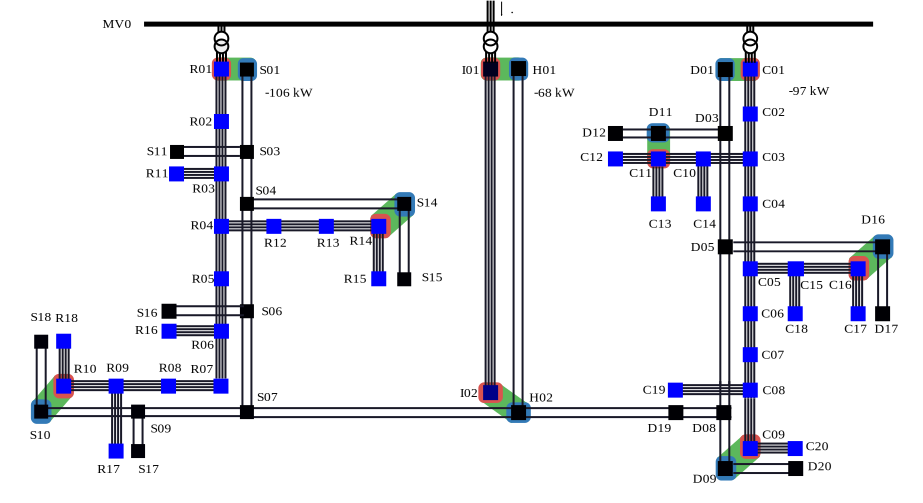

In [10]:
params = {'v_MV0_a_r':1.025* 11547.00,"K_xif":0.01,
'v_MV0_a_i':1.025*     0.00,
'v_MV0_b_r':1.025* -5773.50,
'v_MV0_b_i':1.025*-10000.00,
'v_MV0_c_r':1.025* -5773.50,
'v_MV0_c_i':1.025* 10000.00}

excel_file = '../cigre_lv.xlsx'
load = tools.loads()
load.case = 'Case 3'
load.read(excel_file)
load.set_loads(20,params)

params_case_1 = {'p_vsc_R01':-80e3, 'p_vsc_C01':-80e3, 
                 'p_vsc_R10':90e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':60e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':40e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':50e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_2 = {'p_vsc_R01':-100e3, 'p_vsc_C01':-100e3, 
                 'p_vsc_R10':50e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':20e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':20e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':10e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_3 = {'p_vsc_R01':-150e3, 'p_vsc_C01':-150e3, 
                 'p_vsc_R10':50e3, 'coef_a_R10':1,'coef_b_R10':0.0,'coef_c_R10':0.0,
                 'p_vsc_R14':20e3, 'coef_a_R14':1,'coef_b_R14':0.0,'coef_c_R14':0.0,
                 'p_vsc_C09':10e3, 'coef_a_C09':1,'coef_b_C09':0.0,'coef_c_C09':0.0,
                 'p_vsc_C11':20e3, 'coef_a_C11':1,'coef_b_C11':0.0,'coef_c_C11':0.0,
                 'p_vsc_C16':10e3, 'coef_a_C16':1,'coef_b_C16':0.0,'coef_c_C16':0.0,}

if load.case == 'Case 1': params.update(params_case_1)
if load.case == 'Case 2': params.update(params_case_2)
if load.case == 'Case 3': params.update(params_case_3)

grid = cigre_eu_lv_acdc.model()
grid.ini(params,'xy_0.json')
s = svg('./figs/cigre_eu_lv_acdc_v2.svg')
s.set_grid(grid,'cigre_eu_lv_acdc.json')
s.set_text('VSC_R01_S01_P',f"{grid.get_value('p_vsc_S01')/1000:2.0f} kW")
s.set_text('VSC_I01_H01_P',f"{grid.get_value('p_vsc_H01')/1000:2.0f} kW")
s.set_text('VSC_C01_D01_P',f"{grid.get_value('p_vsc_D01')/1000:2.0f} kW")
# S_grid = tools.get_head_power(grid)
# s.set_text('MV0_P',f"{S_grid.real/1000:5.1f} kW")
s.set_tooltips('case_2_opt.svg')    
SVG('case_2_opt.svg')


In [22]:

params = {'v_MV0_a_r':1.025* 11547.00,
'v_MV0_a_i':1.025*     0.00,
'v_MV0_b_r':1.025* -5773.50,
'v_MV0_b_i':1.025*-10000.00,
'v_MV0_c_r':1.025* -5773.50,
'v_MV0_c_i':1.025* 10000.00}

excel_file = '../cigre_lv.xlsx'
load = tools.loads()
load.case = 'Case 0'
load.read(excel_file)
load.set_loads(21,params)

params_case_1 = {'p_vsc_R01':-80e3, 'p_vsc_C01':-80e3, 
                 'p_vsc_R10':90e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':60e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':40e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':50e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_2 = {'p_vsc_R01':-100e3, 'p_vsc_C01':-100e3, 
                 'p_vsc_R10':50e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':20e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':20e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':10e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_3 = {'p_vsc_R01':-150e3, 'p_vsc_C01':-150e3, 
                 'p_vsc_R10':50e3, 'coef_a_R10':1,'coef_b_R10':0.0,'coef_c_R10':0.0,
                 'p_vsc_R14':20e3, 'coef_a_R14':1,'coef_b_R14':0.0,'coef_c_R14':0.0,
                 'p_vsc_C09':10e3, 'coef_a_C09':1,'coef_b_C09':0.0,'coef_c_C09':0.0,
                 'p_vsc_C11':20e3, 'coef_a_C11':1,'coef_b_C11':0.0,'coef_c_C11':0.0,
                 'p_vsc_C16':10e3, 'coef_a_C16':1,'coef_b_C16':0.0,'coef_c_C16':0.0,}
    
grid_0 = cigre_eu_lv_acdc.model()
grid_1 = cigre_eu_lv_acdc.model()
grid_2 = cigre_eu_lv_acdc.model()
grid_3 = cigre_eu_lv_acdc.model()

grids = [grid_0,grid_1,grid_2,grid_3]

load_0 = tools.loads()
load_1 = tools.loads()
load_2 = tools.loads()
load_3 = tools.loads()

loads_list = [load_0,load_1,load_2,load_3]
cases_names = ['Case 0','Case 1','Case 2','Case 3']
params_list = [{},params_case_1,params_case_2,params_case_3]

for grid,case_params in zip(grids,params_list):
    grid.Dt,grid.decimation = 60*60,1
    grid.params = params
    grid.params.update(case_params)
    grid.ini(grid.params,'xy_0_case2.json')
    grid.eval_preconditioner_trap()

for load,case in zip(loads_list,['Case 0','Case 1','Case 2','Case 3']):
    load.case = case
    load.read(excel_file)
 
h = 0
for grid,load in zip(grids,loads_list):
    grid.case_name = load.case
    load.set_loads(h,grid.params)
    grid.ini(grid.params,'xy_0_case2.json')

        
times = np.arange(0,22,1)*60*60

t_0 = time.time()
for t in times:
    h = t/3600
    for grid,load in zip(grids,loads_list):
        load.set_loads(h,grid.params)
        grid.run(t,grid.params)
        
for grid in grids:
    grid.post();

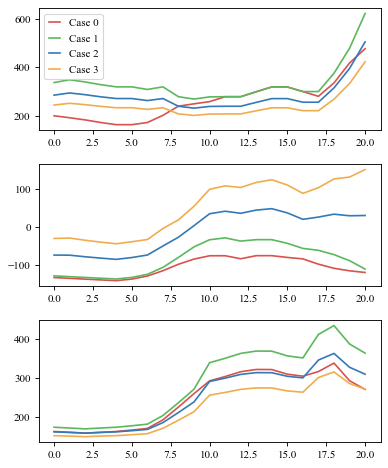

In [23]:
fig, axes = plt.subplots(nrows=3, figsize=(5.0, 6.0),dpi=80)
#axes[1].yscale=0.2
fig.tight_layout()

for ig,grid in enumerate(grids):
    axes[0].plot(grid.Time/3600, grid.get_values('p_t_MV0_R01_1')/1e3,color=colors[ig], label=grid.case_name)
    axes[1].plot(grid.Time/3600, grid.get_values('p_t_MV0_I01_1')/1e3,color=colors[ig])
    axes[2].plot(grid.Time/3600, grid.get_values('p_t_MV0_C01_1')/1e3,color=colors[ig])

axes[0].legend()

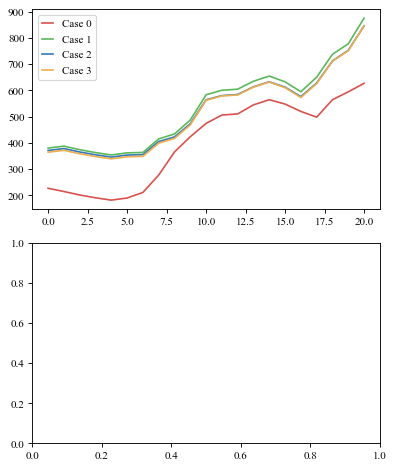

In [24]:
fig, axes = plt.subplots(nrows=2, figsize=(5.0, 6.0),dpi=80)
#axes[1].yscale=0.2
fig.tight_layout()

for ig,grid in enumerate(grids):
    p_res = grid.get_values('p_t_MV0_R01_1')
    p_ind = grid.get_values('p_t_MV0_I01_1')
    p_com = grid.get_values('p_t_MV0_C01_1')
    
    axes[0].plot(grid.Time/3600, (p_res+p_ind+p_com)/1e3,color=colors[ig], label=grid.case_name)

axes[0].legend()

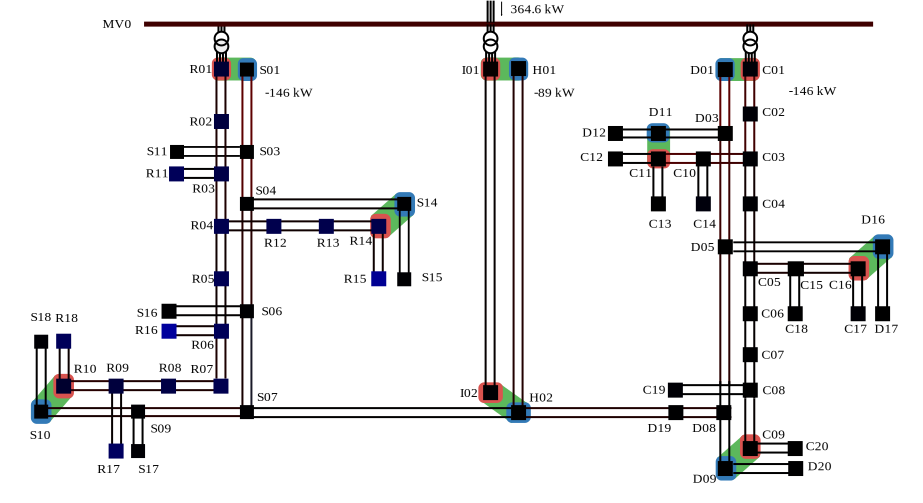

In [27]:
grid = grids[3]
idx = 12
s = svg('./figs/cigre_eu_lv_acdc_2w2w.svg')
s.set_grid(grid,'cigre_eu_lv_acdc.json')
s.set_text('VSC_R01_S01_P',f"{grid.get_values('p_vsc_S01')[idx]/1000:2.0f} kW")
s.set_text('VSC_I01_H01_P',f"{grid.get_values('p_vsc_H01')[idx]/1000:2.0f} kW")
s.set_text('VSC_C01_D01_P',f"{grid.get_values('p_vsc_D01')[idx]/1000:2.0f} kW")
S_grid = tools.get_head_power(grid)
s.set_text('MV0_P',f"{S_grid.real/1000:5.1f} kW")
s.set_tooltips('case_3_opt.svg')    
SVG('case_3_opt.svg')

In [29]:
grid.Time[12]

43200.0

In [32]:
150/690*1e3

217.3913043478261